# Vis: Histograms

*Purpose*: *Histograms* are a key tool for EDA, as they are a powerful lense to help us understand how a single variable is "distributed" in a dataset. In this exercise we'll introduce and interpret histograms and some variants (frequency polygons).


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

We'll use the `mpg` dataset from `plotnine`: This is a dataset describing different automobiles, including their mileage (hence mpg).


In [2]:
from plotnine.data import mpg as df_mpg

# Introduction

## What is a Histogram?

As we saw in the previous exercise, a bar plot shows the count of observations within various categories:


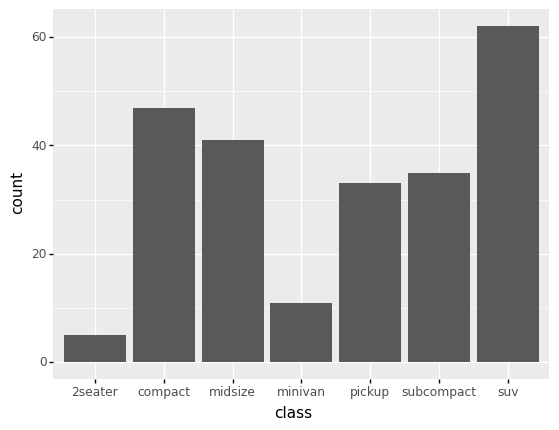

<ggplot: (8792286165800)>

In [3]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes(x="class"))
    + gr.geom_bar()
)

However, if we try to visualize a *continuous* variable with a bar chart, we're likely to run into issues. It happens that the *exact same* values do occur multiple times in the `df_mpg` dataset, but that is due to rounding:


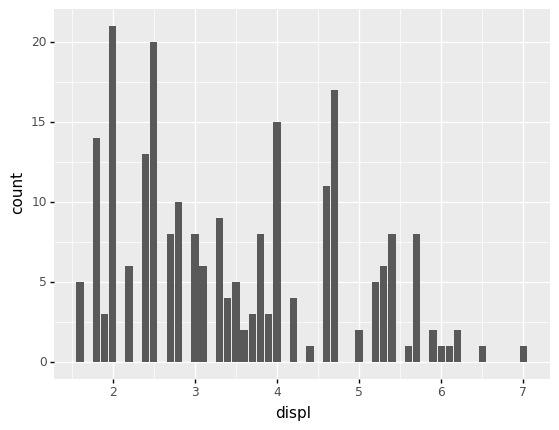

<ggplot: (8792339961366)>

In [4]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes(x="displ"))
    + gr.geom_bar()
)

If we didn't have rounding, it would be harder to visualize the data with a bar chart:


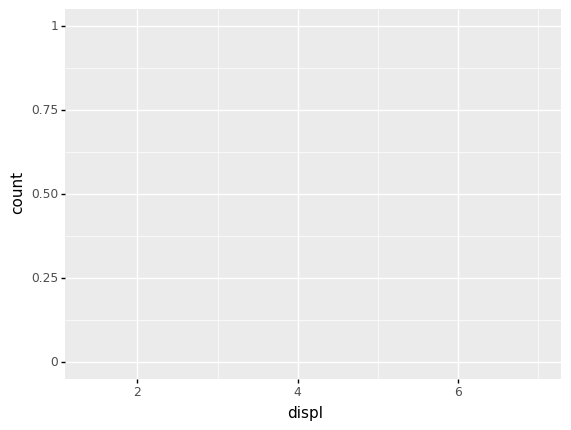

<ggplot: (8792286287445)>

In [5]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.tf_mutate(
        ## Simulate a lack of rounding by "jittering" the displ values
        displ=DF.displ + gr.marg_mom("norm", mean=0, sd=0.1).r(df_mpg.shape[0])
    )
    >> gr.ggplot(gr.aes(x="displ"))
    + gr.geom_bar()
)

Rather than *assuming* repetitions of continuous values, we can instead *bin* the values into groups. For instance, the following bins the `displ` values to the nearest integer:


In [6]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.tf_mutate(displ_group=DF.displ // 1)
    >> gr.tf_select(DF.displ, DF.displ_group, gr.everything())
)

,displ,displ_group,manufacturer,model,year,cyl,trans,drv,cty,hwy,fl,class
0,1.8,1.0,audi,a4,1999,4,auto(l5),f,18,29,p,compact
1,1.8,1.0,audi,a4,1999,4,manual(m5),f,21,29,p,compact
2,2.0,2.0,audi,a4,2008,4,manual(m6),f,20,31,p,compact
3,2.0,2.0,audi,a4,2008,4,auto(av),f,21,30,p,compact
4,2.8,2.0,audi,a4,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,2.0,2.0,volkswagen,passat,2008,4,auto(s6),f,19,28,p,midsize
230,2.0,2.0,volkswagen,passat,2008,4,manual(m6),f,21,29,p,midsize
231,2.8,2.0,volkswagen,passat,1999,6,auto(l5),f,16,26,p,midsize
232,2.8,2.0,volkswagen,passat,1999,6,manual(m5),f,18,26,p,midsize


We can use the binned `displ` to create groups and compute counts within each group.


In [7]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.tf_mutate(displ_group=DF.displ // 1)
    >> gr.tf_count(DF.displ_group)
)

,displ_group,n
0,1.0,22
1,2.0,78
2,3.0,48
3,4.0,48
4,5.0,32
5,6.0,5
6,7.0,1


Now we can visualize those counts `n` with a column chart:


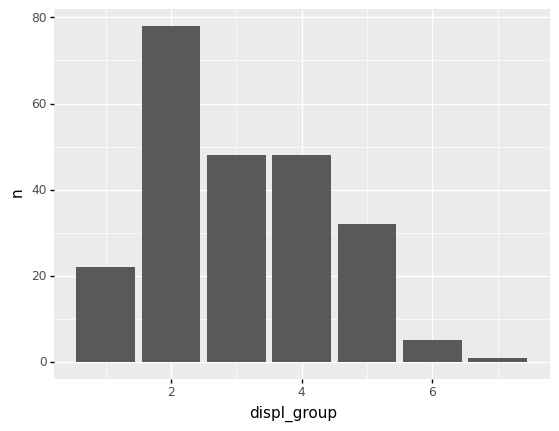

<ggplot: (8792318387026)>

In [8]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.tf_mutate(displ_group=DF.displ // 1)
    >> gr.tf_count(DF.displ_group)
    >> gr.ggplot(gr.aes(x="displ_group", y="n"))
    + gr.geom_col()
)


## Enter `gr.geom_histogram()`

Rather than do all of that grouping manually, the geometry `gr.geom_histogram()` does this automatically. This geometry accepts a `bins` argument that allows us to change the **number** of groups; ggplot then figures out the bin widths automatically.


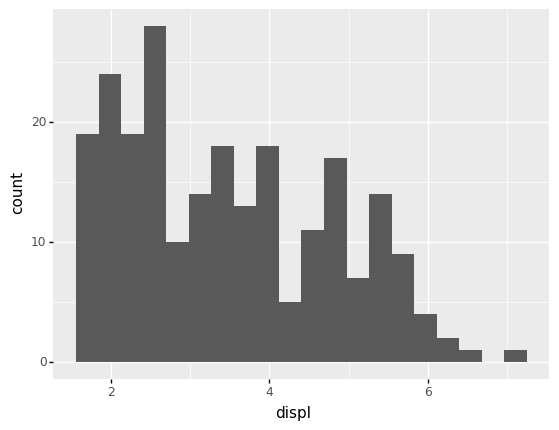

<ggplot: (8792318416818)>

In [9]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes(x="displ"))
    + gr.geom_histogram(bins=20)
)

## What do Histograms tell us?

Histograms give us a visual sense of *frequency of values* in a dataset. This provides an *extremely* useful window into "what is going on" in any given continuous variable. From a histogram, we can tell:

- Which are more common values?
- Which are less common values?
- Do observations tend to cluster at particular values?
  - *Note*: A "bump" or "cluster" of points is sometimes called a *mode*. A dataset with multiple bumps is then called *multi-modal*.
- What range of values occur?

And so much more.

For example, let's interpret the `displ` histogram from above.


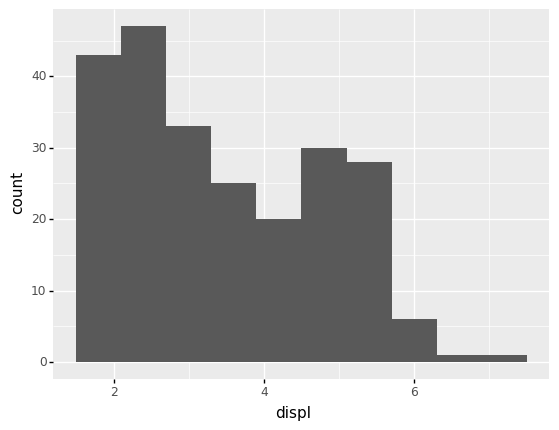

<ggplot: (8792318419065)>

In [10]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes(x="displ"))
    + gr.geom_histogram(bins=10)
)

*Here are my observations*

- `displ` ranges between a little under `2` and a bit above `6`.
- Smaller values (around `2`) are more common.
- There is an additional "bump" around `displ == 5`.
- Values of `displ == 6` and above are quite rare.

Part of the value of such a plot is that it can help us to frame other questions, such as "Which vehicles *do* have a `displ >= 6`?


## Rule #1 of Histograms

Note that we have to select a number of `bins` when we construct a histogram. This is an important parameter that makes a big difference. Therefore, we have `Rule #1 of Histograms`:

```{admonition} Rule #1 of Histograms
Experiment with different numbers of `bins` when plotting a histogram.
```

Different bin counts will enable different observations. For instance, still with the `df_mpg` dataset. You'll practice this below.


### __q1__ Change the bin size

Re-construct the histogram of `displ` in `df_mpg`, and experiment with different bin sizes. Answer the questions under *observations* below.


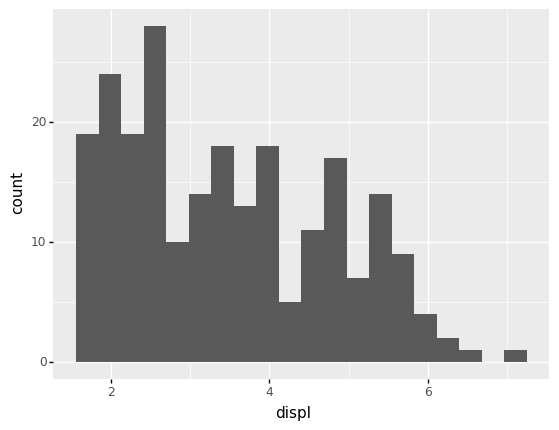

<ggplot: (8792318413114)>

In [11]:
## TASK: Create a histogram of `displ`, experiment with the number of bins
(
    df_mpg
    >> gr.ggplot(gr.aes(x="displ"))
    + gr.geom_histogram(bins=20)
)

*Observations*

- What *additional* observations can you make, based on varying the `bins` argument?
  - With the larger number of `bins=2`, we can see that there may actually be three "bumps" in values, with a concentration of values around `displ == 2`, one around `displ ~= 3.5`, and a third around `displ == 5`.


## Histogram Variant: Frequency Polygons

A useful variant of the histogram is the *frequency polygon*. This simply visualizes the counts as a line rather than with bars:


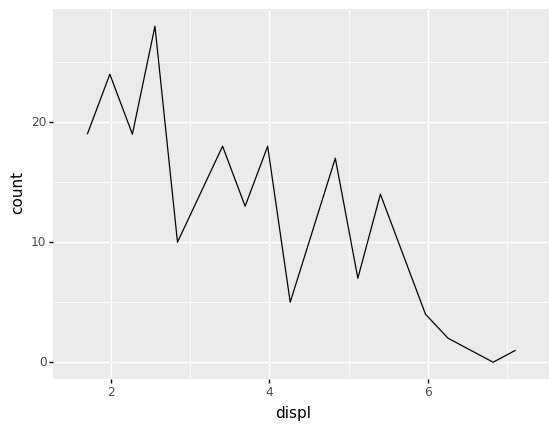

<ggplot: (8792318427935)>

In [12]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes(x="displ"))
    + gr.geom_freqpoly(bins=20)
)

This may seem like a silly distinction to make, but it is actually *extremely useful* when we start comparing multiple histograms on the same plot. While we would have to dodge (or stack---yuck) bars with multiple groups, lines can sit on top of one another:


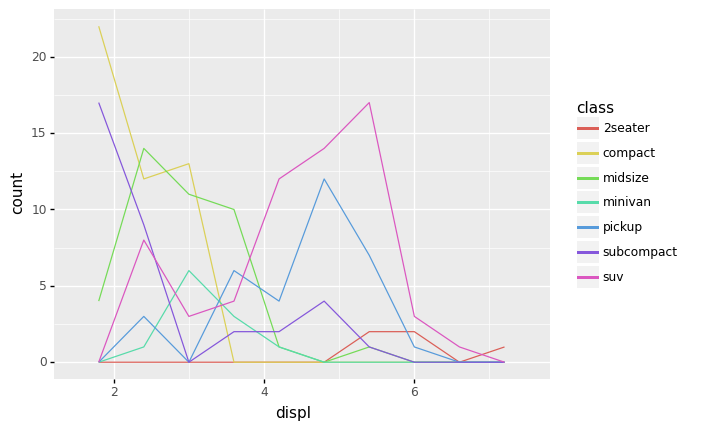

<ggplot: (8792339925101)>

In [13]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes(x="displ", color="class"))
    + gr.geom_freqpoly(bins=10)
)

From this frequency polygon plot, we can now see all manner of new insights! For instance:

- The `2seater` class tends to have much higher `displ`
- The `suv` class tends to have higher `displ`, but some are near the low end
- The `midsize` class tends to have much lower `displ`


# Case Study: Diamonds

Now let's practice using histograms with the diamonds dataset.


In [14]:
from grama.data import df_diamonds
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


This is a dataset of nearly 54,000 diamonds, including their sale price and characteristics (carat, cut, color, clarity) and geometry.

### __q2__ Study the `carat` distribution

Create a histogram of the `carat`. Answer the questions under *observations* below.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 142'. Pick better value with 'binwidth'.


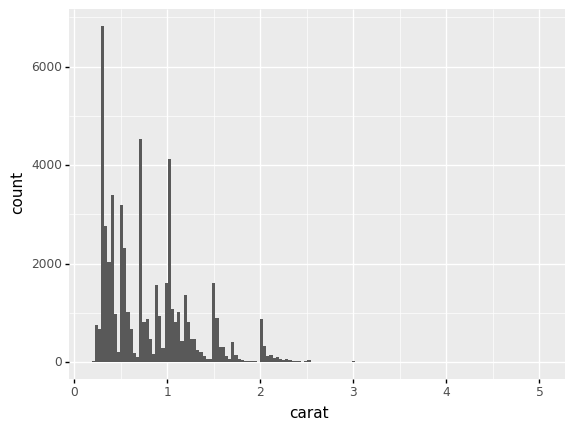

<ggplot: (8792318390149)>

In [15]:
## TASK: Create a histogram of `carat`
(
    df_diamonds
    >> gr.ggplot(gr.aes(x="carat"))
    + gr.geom_histogram()
)

*Observations*

- What range of `carat` values occur in the dataset?
  - We see `carat` values from around `0.25` up to around `5`.
- What values tend to be more common?
  - This is a highly multi-modal distribution of values (many bumps), but broadly we see more values between `0.25 < carat < 2.0`.
- What values tend to be less common?
  - Values of `carat` above 3 are very rare, and we see a lot of "space" between the multiple-modes below `2`.
<!-- solution-end -->

### __q3__ Study the `carat` distribution, closer look

Inspect the following plot. Answer the questions under *observations* below.


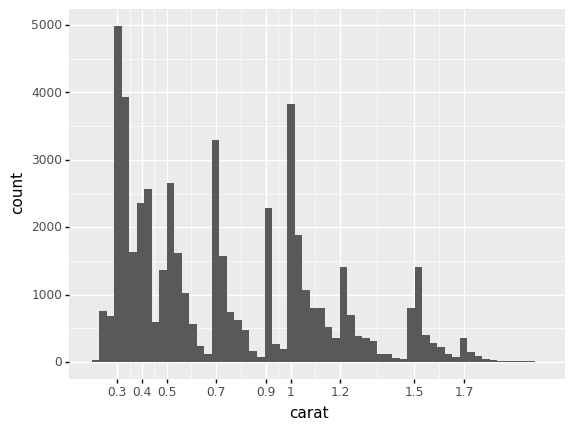

<ggplot: (8792339928308)>

In [16]:
## TASK: No need to edit; run and inspect
(
    df_diamonds
    >> gr.tf_filter(DF.carat < 2.0)
    >> gr.ggplot(gr.aes(x="carat"))
    + gr.geom_histogram(bins=60)
    + gr.scale_x_continuous(breaks=(0.3, 0.4, 0.5, 0.7, 0.9, 1.0, 1.2, 1.5, 1.7))
)

*Observations*

- What do you notice about the most-common values of `carat`?
  - We see *very* sharp concentrations around "special" values, such as `carat == 1.0`. We also see that values tend to land at values larger than these "special" values, but not below. Put differently, the modes around each special value are asymmetric---they skew towards larger values.
- Note that `carat` is a quality that a jeweler can control, to some extent. When cutting a diamond, a jeweler can choose to take off less material in order to preserve `carat`, possibly at the loss of not getting as high quality a `cut`. What does the histogram above suggest about jeweler behavior?
  - The concentration around "special" values probably relates to what purchasers of diamonds want: It could be that the "special" values are desirable values of `carat`. This may also explain the skew we see around each special value; people may like a `carat == 1.01` diamond, but a `carat == 0.99` might make you look like a cheapskate. Particularly since diamonds are used in engagement rings, there is likely social pressure around these numbers!
<!-- solution-end -->

### __q4__ Bring in the `cut`

Re-create the plot from __q3__, but visualize the `cut` as well. Answer the questions under *observations* below.


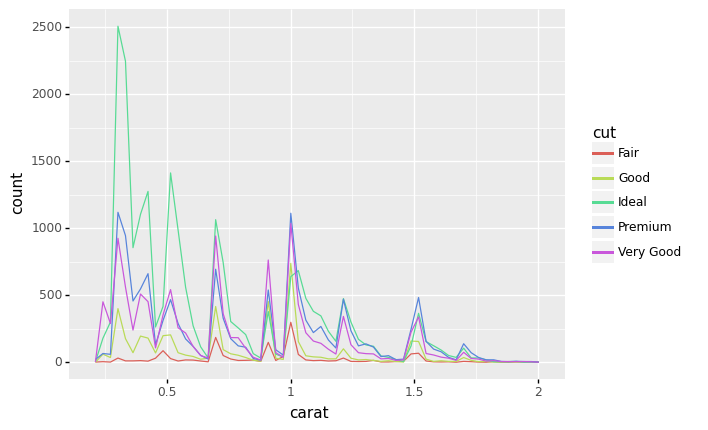

<ggplot: (8792340497851)>

In [17]:
## TASK: Re-create the plot from q3, but visualize the `cut` as well
(
    df_diamonds
    >> gr.tf_filter(DF.carat < 2.0)
    >> gr.ggplot(gr.aes(x="carat", color="cut"))
    + gr.geom_freqpoly(bins=60)
)

*Observations*

- What is the most numerous `cut` at lower `carat` values? (Say `carat <= 0.5`)
  - `Ideal` cut diamonds are the most numerous at lower `carat` values.
- What is the most numerous cut around `carat == 1.0`?
  - `Premium` is the most numerous around `carat == 1.0`, though it is closely followed by `Very Good`.
<!-- solution-end -->